In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [104]:
df =pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [105]:
print(df.shape)
df.info()

(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [106]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#df['label']=lb.fit_transform(df['label'])

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [107]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [108]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [109]:
df.drop_duplicates().shape

(2200, 8)

scaling 

In [110]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.pipeline import Pipeline 

#Pipelined =Pipeline(steps=[
 #   ('scale',MinMaxScaler())
#])
#df_scaled=Pipelined.fit_transform(df)
#df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
#df_scaled.head()



Detecting outliers 


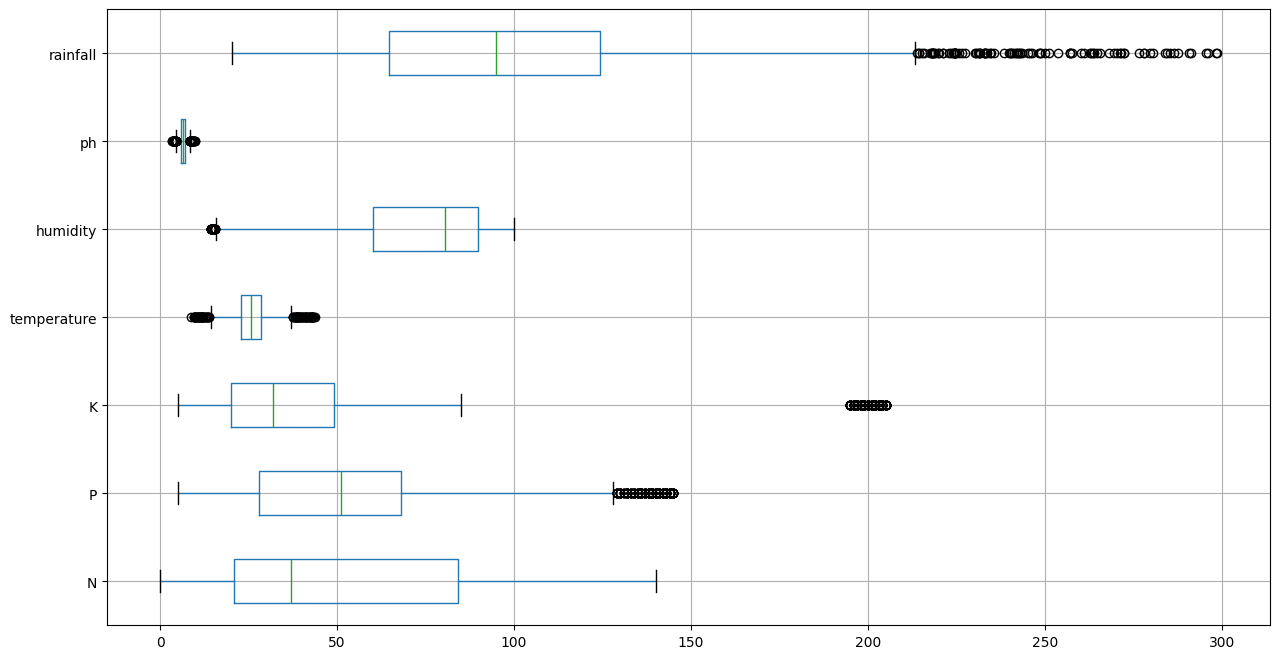

In [111]:
plt.figure(figsize=(15,8))
df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

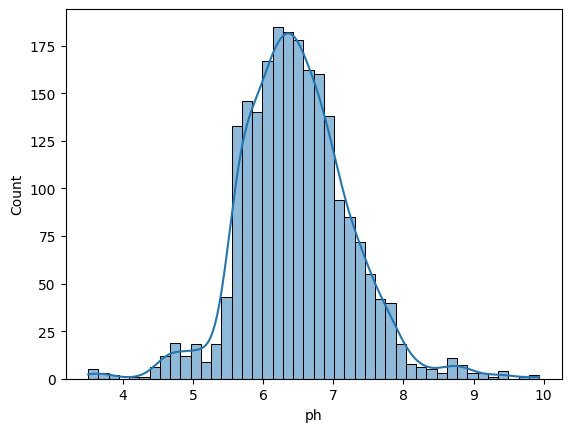

In [112]:
sns.histplot(df['ph'],kde=True)
plt.show()

Cap all columns

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\_util.py:729: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


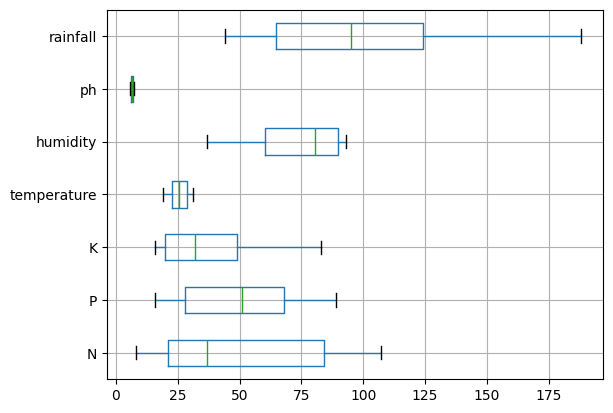

In [113]:
from scipy.stats.mstats import winsorize

for i in df.columns:
    df[i] =winsorize(df[i],limits=[0.10,0.10])

df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [114]:
#sns.heatmap(df.corr(),annot=True)
#plt.show()

In [115]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

x=df.drop('label',axis=1)
y= df['label']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)



dt =DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)



DecisionTreeClassifier(random_state=10)

In [116]:
y_pred=dt.predict(X_test)
#print(classification_report(y_pred,y_test))
print("accuracy: ",accuracy_score(y_pred,y_test))
print("confusion_matrix: \n",confusion_matrix(y_pred,y_test))

accuracy:  0.9696969696969697
confusion_matrix: 
 [[88  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  3  0  3]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 

Visualising the tree 

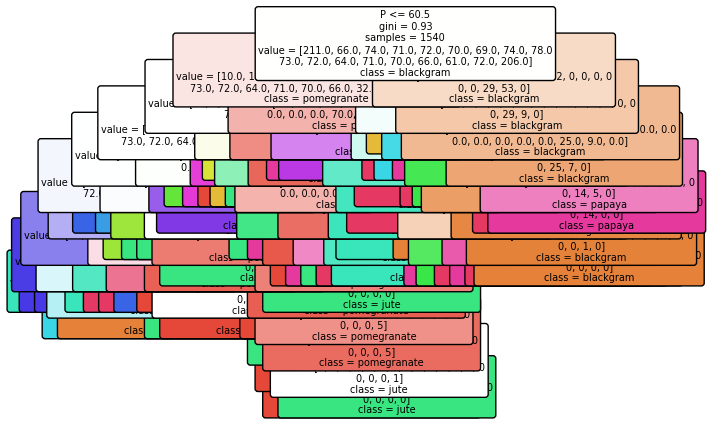

In [117]:
from sklearn.tree import plot_tree

plt.Figure(figsize=(100,100))
plot_tree(dt,feature_names=x.columns,
          class_names=[str(c) for c in dt.classes_],
          filled=True,
          rounded=True,
          fontsize=7
          )
plt.show()

In [119]:
feat_imp = pd.DataFrame({
    "feature":x.columns,
    "importance" :dt.feature_importances_
})
print(feat_imp)

       feature  importance
0            N    0.120541
1            P    0.095978
2            K    0.198422
3  temperature    0.109534
4     humidity    0.242599
5           ph    0.002147
6     rainfall    0.230779
